<a href="https://colab.research.google.com/github/jaouni24/Preprocessing-for-Electric-Vehicle-Population-Dataset/blob/main/Assiment_1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import files
uploaded = files.upload()  # Opens a file dialog for upload


Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data (1).csv


The first step is to load the dataset into a DataFrame and ensure it has been loaded correctly by displaying a sample of the data using the `.head()` method from the pandas library.

In [39]:
import pandas as pd
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')  # Replace with your filename
print(df.head())

   VIN (1-10)   County      City    State  Postal Code  Model Year   Make     Model            Electric Vehicle Type          Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  Base MSRP  Legislative District  DOL Vehicle ID         Vehicle Location                        Electric Utility                 2020 Census Tract
0  5UXTA6C0XM     Kitsap    Seabeck   WA     98380.0       2021         BMW        X5  Plug-in Hybrid Electric Vehicle (PHEV)       Clean Alternative Fuel Vehicle Eligible            30.0         0.0             35.0             267929112    POINT (-122.8728334 47.5798304)                         PUGET SOUND ENERGY INC    5.303509e+10   
1  5YJ3E1EB1J     Kitsap    Poulsbo   WA     98370.0       2018       TESLA   MODEL 3          Battery Electric Vehicle (BEV)       Clean Alternative Fuel Vehicle Eligible           215.0         0.0             23.0             475911439    POINT (-122.6368884 47.7469547)                         PUGET SOUND ENERGY INC

To gain a deeper understanding of the dataset, it is essential to explore its structure and characteristics. This includes identifying the existing features (columns), determining the number of rows, analyzing data types, and checking the number of non-null values in each feature. Such an overview helps assess data quality and guides further analysis.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

From the results of the `.info()` method, we can observe that some rows in our dataset contain missing values. To gain more insight, the following code displays the number of `NaN` values for each feature in the dataset.

In [41]:
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


We can observe missing values in several features, including County, city, Postal Code, Electric Range, Base MSRP, Legislative District, Vehicle Location, Electric Utility, and 2020 Census Tract. To calculate, display, and visualize the percentage of missing values relative to the total number of rows, use the following code:



Feature: County
Missing Rows: 4
Percentage: 0.00%

Feature: City
Missing Rows: 4
Percentage: 0.00%

Feature: Postal Code
Missing Rows: 4
Percentage: 0.00%

Feature: Electric Range
Missing Rows: 5
Percentage: 0.00%

Feature: Base MSRP
Missing Rows: 5
Percentage: 0.00%

Feature: Legislative District
Missing Rows: 445
Percentage: 0.21%

Feature: Vehicle Location
Missing Rows: 10
Percentage: 0.00%

Feature: Electric Utility
Missing Rows: 4
Percentage: 0.00%

Feature: 2020 Census Tract
Missing Rows: 4
Percentage: 0.00%



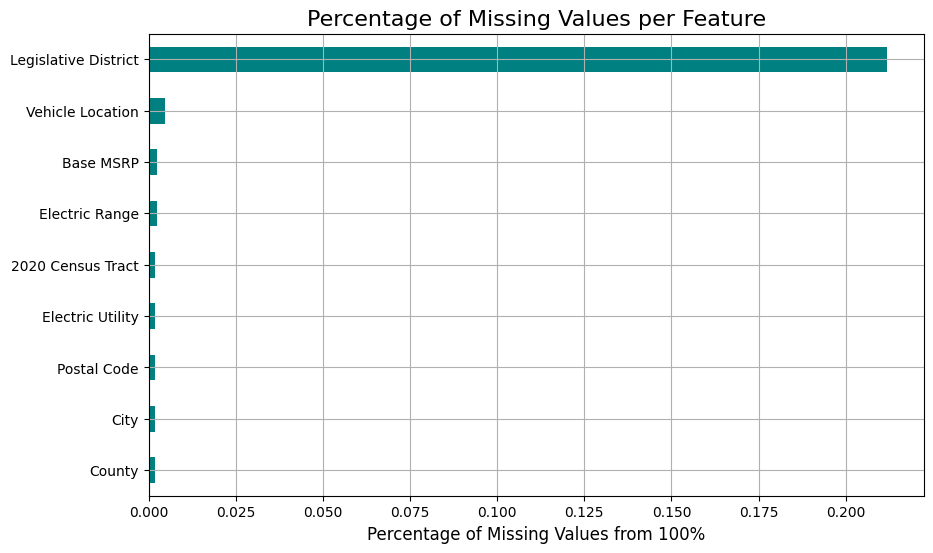

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate missing value counts and percentages
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

# Display the total missing rows and percentages for each feature with missing values
for feature in missing_counts[missing_counts > 0].index:
    missing_rows = missing_counts[feature]
    missing_percentage = missing_percentages[feature]
    print(f"Feature: {feature}")
    print(f"Missing Rows: {missing_rows}")
    print(f"Percentage: {missing_percentage:.2f}%\n")

# Filter out columns with no missing values for visualization
missing_percentages = missing_percentages[missing_percentages > 0]

# Plot the missing percentages as a horizontal bar chart
plt.figure(figsize=(10, 6))
missing_percentages.sort_values().plot(kind='barh', color='teal')
plt.xlabel('Percentage of Missing Values from 100%', fontsize=12)
plt.title('Percentage of Missing Values per Feature', fontsize=16)
plt.grid(True)
plt.show()



Based on the printed percentages and the graph, we can observe that the percentage of missing values for most features is almost zero. Therefore, we can safely drop these features without impacting the analysis. However, the feature "Legislative District" stands out with 445 missing rows, accounting for 0.21% of the dataset. Although this percentage is still small, we will attempt to fill these missing values. For the other features, since their missing values are negligible, filling them would have minimal effect, so we will drop them.

In [43]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210161.000000,210165.000000,210160.000000,210160.000000,209720.000000,2.101650e+05,2.101610e+05
mean,98178.209406,2021.048657,50.602241,897.676889,28.929954,2.290774e+08,5.297929e+10
std,2445.429402,2.988941,86.973210,7653.588604,14.908392,7.115519e+07,1.551466e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948816e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405164e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.629758e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


When we printed the information about the dataset, we observed that some features have missing values while others do not. As a result, there are no entirely empty rows in our dataset that need to be dropped. This means we can focus on addressing the specific features with missing values rather than eliminating entire rows from the dataset.

In [44]:
print(f"Number of empty records = {df.isnull().all(axis=1).sum()}")

Number of empty records = 0


No empty records (rows) exits in the dataset. \\
To drop the rows containing missing values in all features except for "Legislative District," you can use the following code:

In [45]:
df.dropna(subset=['County'], inplace=True)
df.dropna(subset=['Electric Range'], inplace=True)
df.dropna(subset=['Base MSRP'], inplace=True)
df.dropna(subset=['Vehicle Location'], inplace=True)
df.dropna(subset=['Postal Code'], inplace=True)
df.dropna(subset=['Electric Utility'], inplace=True)
df.dropna(subset=['2020 Census Tract'], inplace=True)
df.dropna(subset=['City'], inplace=True)

To check if the rows containing missing values have been successfully deleted, you can print the number of records with missing values for the specified features using the following code:

In [46]:
# Print the number of records with missing values for each feature
print(f"The number of records where County is missing equals {df.isnull()['County'].sum()}")
print(f"The number of records where Electric Range is missing equals {df.isnull()['Electric Range'].sum()}")
print(f"The number of records where Base MSRP is missing equals {df.isnull()['Base MSRP'].sum()}")
print(f"The number of records where Vehicle Location is missing equals {df.isnull()['Vehicle Location'].sum()}")
print(f"The number of records where Postal Code is missing equals {df.isnull()['Postal Code'].sum()}")
print(f"The number of records where Electric Utility is missing equals {df.isnull()['Electric Utility'].sum()}")
print(f"The number of records where 2020 Census Tract is missing equals {df.isnull()['2020 Census Tract'].sum()}")
print(f"The number of records where City is missing equals {df.isnull()['City'].sum()}")

The number of records where County is missing equals 0
The number of records where Electric Range is missing equals 0
The number of records where Base MSRP is missing equals 0
The number of records where Vehicle Location is missing equals 0
The number of records where Postal Code is missing equals 0
The number of records where Electric Utility is missing equals 0
The number of records where 2020 Census Tract is missing equals 0
The number of records where City is missing equals 0


In [47]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210150.000000,210150.000000,210150.000000,210150.000000,209709.000000,2.101500e+05,2.101500e+05
mean,98178.194647,2021.048670,50.602579,897.312039,28.930394,2.290765e+08,5.297929e+10
std,2445.491444,2.988946,86.974319,7652.606144,14.908422,7.115445e+07,1.551507e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948825e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405161e+08,5.303303e+10
75%,98373.000000,2023.000000,42.000000,0.000000,42.000000,2.629754e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


Notice that the descriptive statistics about for the updated features kept almost the same.

Sometimes, a single record may have multiple missing features, which means that the number of empty records for the "Legislative District" feature might remain unchanged or only be slightly reduced after the previous cleaning step. To check the number of rows that still contain a missing value for the "Legislative District" feature, use the following code:

In [48]:
print(f"The number of records where Legislative District is missing equals {df.isnull()['Legislative District'].sum()}")
print(f"The proportion of records where Legislative District is missing equals {100*df.isnull()['Legislative District'].sum()/df.shape[0]}%")

The number of records where Legislative District is missing equals 441
The proportion of records where Legislative District is missing equals 0.20985010706638116%


The number of records containing missing values for the "Legislative District" feature has decreased from 445 to 441.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210150 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210150 non-null  object 
 1   County                                             210150 non-null  object 
 2   City                                               210150 non-null  object 
 3   State                                              210150 non-null  object 
 4   Postal Code                                        210150 non-null  float64
 5   Model Year                                         210150 non-null  int64  
 6   Make                                               210150 non-null  object 
 7   Model                                              210150 non-null  object 
 8   Electric Vehicle Type                              210150 non-null  object 
 9 

To fill the missing values in the "Legislative District" feature using the central tendency method, we first need to assess the skewness coefficient of the feature. This will help us understand its distribution, including the direction and extent of skewness. Afterward, we can visualize the distribution to gain further insights.

Skewness coefficient for Legislative District: -0.43


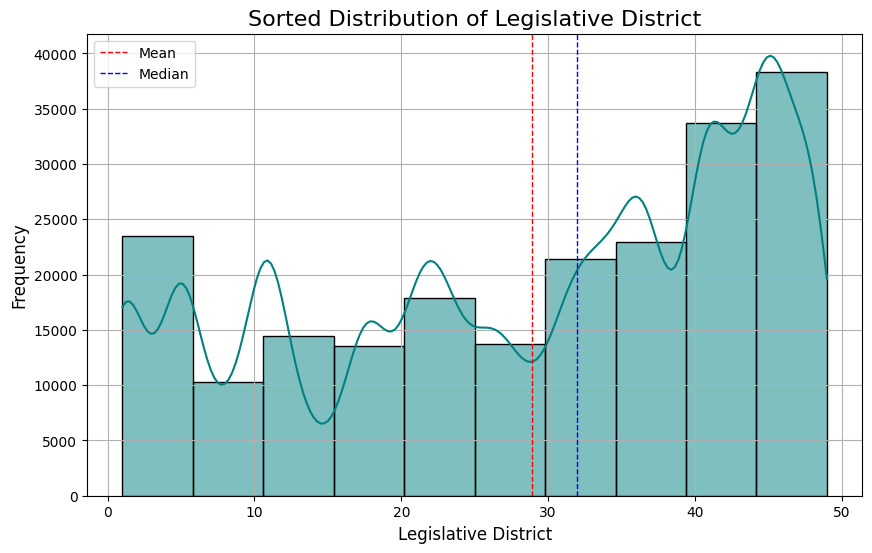

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate skewness coefficient for the Legislative District feature
skewness = df['Legislative District'].skew()
print(f"Skewness coefficient for Legislative District: {skewness:.2f}")

# Sort the Legislative District feature for better visualization
sorted_legislative_district = df['Legislative District'].sort_values()

# Visualize the sorted distribution of the Legislative District feature
plt.figure(figsize=(10, 6))
sns.histplot(sorted_legislative_district, bins=10, kde=True, color='teal')
plt.title('Sorted Distribution of Legislative District', fontsize=16)
plt.xlabel('Legislative District', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['Legislative District'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Legislative District'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.grid(True)
plt.show()


We can observe the that Legislative District is negatively skewed since the skewness cooficent is negative and equal to -0.43. Additionaly the median is higher than mean with is another indicatior. To better fill the missing values for Legislative District is to use the median.

In [51]:
import pandas as pd

# Set display options for better output formatting
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set a wider width
pd.set_option('display.colheader_justify', 'center')  # Center-align column headers

# Display first 5 rows with missing values in "Legislative District" before filling
missing_legislative_district_rows = df[df['Legislative District'].isnull()]
print(" Sample rows with missing values in 'Legislative District' before filling:")
print(missing_legislative_district_rows.head(5).to_string(index=False))  # Display 5 rows without index

# Calculate the mode value of "Legislative District"
mean_legislative_district = df['Legislative District'].mean()


# Calculate the median value of "Legislative District"
# median_legislative_district = df['Legislative District'].median()


# Fill missing values with the mean
df['Legislative District'].fillna(mean_legislative_district, inplace=True)

# Fill missing values with the median
# df['Legislative District'].fillna(median_legislative_district, inplace=True)

# Display the same sample rows after filling the missing values
print("\nSample rows with missing values in 'Legislative District' after filling with median:")
print(df.loc[missing_legislative_district_rows.index].head(5).to_string(index=False))




 Sample rows with missing values in 'Legislative District' before filling:
VIN (1-10) County  City  State  Postal Code  Model Year    Make       Model             Electric Vehicle Type               Clean Alternative Fuel Vehicle (CAFV) Eligibility        Electric Range  Base MSRP  Legislative District  DOL Vehicle ID         Vehicle Location                   Electric Utility            2020 Census Tract
1GKB0RDCXR Macomb Warren   MI    48092.0        2024          GMC HUMMER EV SUV         Battery Electric Vehicle (BEV) Eligibility unknown as battery range has not been researched        0.0         0.0              NaN             273369309       POINT (-83.064593 42.512487) NON WASHINGTON STATE ELECTRIC UTILITY    2.609926e+10   
1GKB0RDC0R Macomb Warren   MI    48092.0        2024          GMC HUMMER EV SUV         Battery Electric Vehicle (BEV) Eligibility unknown as battery range has not been researched        0.0         0.0              NaN             269827470       POINT (-8

<ipython-input-51-d89339ea48d3>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Legislative District'].fillna(mean_legislative_district, inplace=True)


In [52]:
# Calculate skewness coefficient for the Legislative District feature
skewness = df['Legislative District'].skew()
print(f"Skewness coefficient for Legislative District: {skewness:.2f}")

df.describe()

Skewness coefficient for Legislative District: -0.43


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,2.101500e+05,2.101500e+05
mean,98178.194647,2021.048670,50.602579,897.312039,28.930394,2.290765e+08,5.297929e+10
std,2445.491444,2.988946,86.974319,7652.606144,14.892771,7.115445e+07,1.551507e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948825e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405161e+08,5.303303e+10
75%,98373.000000,2023.000000,42.000000,0.000000,42.000000,2.629754e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


When missing values were filled using the median, the absolute value of the skewness coefficient increased by 0.01. However, when the mean was used for imputation, the skewness coefficient remained unchanged -0.43.

In [53]:
# Dataset with 'Legislative District' nulls replaced by median (first 10 rows)
print("\nDataset with 'Legislative District' nulls replaced by mode (first 10 rows):")
print(df.head(10))


Dataset with 'Legislative District' nulls replaced by mode (first 10 rows):
   VIN (1-10)   County      City    State  Postal Code  Model Year   Make     Model            Electric Vehicle Type          Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  Base MSRP  Legislative District  DOL Vehicle ID         Vehicle Location                        Electric Utility                 2020 Census Tract
0  5UXTA6C0XM     Kitsap    Seabeck   WA     98380.0       2021         BMW        X5  Plug-in Hybrid Electric Vehicle (PHEV)       Clean Alternative Fuel Vehicle Eligible            30.0         0.0             35.0             267929112    POINT (-122.8728334 47.5798304)                         PUGET SOUND ENERGY INC    5.303509e+10   
1  5YJ3E1EB1J     Kitsap    Poulsbo   WA     98370.0       2018       TESLA   MODEL 3          Battery Electric Vehicle (BEV)       Clean Alternative Fuel Vehicle Eligible           215.0         0.0             23.0             475911439    P

In [54]:
print(df.loc[40238])

VIN (1-10)                                                                                  1GKB0RDCXR
County                                                                                          Macomb
City                                                                                            Warren
State                                                                                               MI
Postal Code                                                                                    48092.0
Model Year                                                                                        2024
Make                                                                                               GMC
Model                                                                                    HUMMER EV SUV
Electric Vehicle Type                                                   Battery Electric Vehicle (BEV)
Clean Alternative Fuel Vehicle (CAFV) Eligibility    Eligibility unknown 

To ensure that the mean value was correctly substituted for the missing entries in the *Legislative District* field, we printed a row that originally contained a missing value.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210150 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210150 non-null  object 
 1   County                                             210150 non-null  object 
 2   City                                               210150 non-null  object 
 3   State                                              210150 non-null  object 
 4   Postal Code                                        210150 non-null  float64
 5   Model Year                                         210150 non-null  int64  
 6   Make                                               210150 non-null  object 
 7   Model                                              210150 non-null  object 
 8   Electric Vehicle Type                              210150 non-null  object 
 9 

Now no features has missing values in our dataset.

To handle feature encoding, we first need to identify which features actually require encoding. Encoding is typically applied to features of type *object*. However, we will retain *VIN (1-10)*, *County*, *City*, and *State* without encoding, as there is no need for transformation.

In [56]:
# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Make'].nunique()
print(f"Number of distinct values in 'Make' column: {num_unique_makes}")

# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Model'].nunique()
print(f"Number of distinct values in 'Model' column: {num_unique_makes}")

# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Electric Vehicle Type'].nunique()
print(f"Number of distinct values in 'Electric Vehicle Type' column: {num_unique_makes}")

# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].nunique()
print(f"Number of distinct values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' column: {num_unique_makes}")

# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Electric Utility'].nunique()
print(f"Number of distinct values in 'Electric Utility' column: {num_unique_makes}")

Number of distinct values in 'Make' column: 43
Number of distinct values in 'Model' column: 153
Number of distinct values in 'Electric Vehicle Type' column: 2
Number of distinct values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' column: 3
Number of distinct values in 'Electric Utility' column: 74


Based on the results, *Make*, *Model*, and *Electric Utility* have a high number of distinct values—43, 153, and 74, respectively. On the other hand, *Clean Alternative Fuel Vehicle (CAFV) Eligibility* (in its different conditions) has fewer unique values, with 2 and 3 categories. As a result, we will apply one-hot encoding to the features with fewer categories and label encoding to those with a larger number of distinct values.

In [57]:
# Import the necessary library for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder with 'handle_unknown' set to 'ignore'
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Use dense array output

# Select the columns to be one-hot encoded
columns_to_encode = ['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Fit the encoder on the selected columns
enc.fit(df[columns_to_encode])

# Transform the selected columns into a one-hot encoded array
df_encoded = enc.transform(df[columns_to_encode])

# Get the one-hot encoded column names from the encoder
encoded_col_names = enc.get_feature_names_out(columns_to_encode)

# Convert the one-hot encoded array into a DataFrame with proper column names
df_encoded = pd.DataFrame(df_encoded, columns=encoded_col_names)

# Reset index to align with the original DataFrame (if needed)
df_encoded.index = df.index

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original columns that were one-hot encoded
df.drop(columns=columns_to_encode, inplace=True)

# Display the first few rows of the updated DataFrame
print(df.head())


   VIN (1-10)   County      City    State  Postal Code  Model Year   Make     Model    Electric Range  Base MSRP  Legislative District  DOL Vehicle ID         Vehicle Location                        Electric Utility                 2020 Census Tract  Electric Vehicle Type_Battery Electric Vehicle (BEV)  Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
0  5UXTA6C0XM     Kitsap    Seabeck   WA     98380.0       2021         BMW        X5        30.0         0.0             35.0             267929112    POINT (-122.8728334 47.5798304)                         PUGET SOUND ENERGY INC    5.303509e+10                            0.0                                                   1.0           

In [58]:
# Import the necessary library for label encoding
from sklearn.preprocessing import LabelEncoder

# List of columns to apply label encoding
columns_to_encode = ['Make', 'Model', 'Electric Utility']

# Loop through each column and apply Label Encoding
for col in columns_to_encode:
    # Create a LabelEncoder instance
    le = LabelEncoder()

    # Fit and transform the column, and update it in the original DataFrame
    df[col] = le.fit_transform(df[col])

# Display the first few rows of the updated DataFrame
print(df.head())


   VIN (1-10)   County      City    State  Postal Code  Model Year  Make  Model  Electric Range  Base MSRP  Legislative District  DOL Vehicle ID         Vehicle Location          Electric Utility  2020 Census Tract  Electric Vehicle Type_Battery Electric Vehicle (BEV)  Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
0  5UXTA6C0XM     Kitsap    Seabeck   WA     98380.0       2021       5    147         30.0         0.0             35.0             267929112    POINT (-122.8728334 47.5798304)         71           5.303509e+10                            0.0                                                   1.0                                                           1.0                   

In [59]:
df.describe()

,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
count,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,2.101500e+05,210150.000000,2.101500e+05,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000
mean,98178.194647,2021.048670,27.020571,86.143926,50.602579,897.312039,28.930394,2.290765e+08,59.338587,5.297929e+10,0.787766,0.212234,0.333224,0.564601,0.102175
std,2445.491444,2.988946,12.037787,30.527526,86.974319,7652.606144,14.892771,7.115445e+07,18.653909,1.551507e+09,0.408891,0.408891,0.471367,0.495810,0.302879
min,1731.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.469000e+03,0.000000,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98052.000000,2019.000000,16.000000,86.000000,0.000000,0.000000,17.000000,1.948825e+08,55.000000,5.303301e+10,1.000000,0.000000,0.000000,0.000000,0.000000
50%,98125.000000,2022.000000,36.000000,89.000000,0.000000,0.000000,32.000000,2.405161e+08,71.000000,5.303303e+10,1.000000,0.000000,0.000000,1.000000,0.000000
75%,98373.000000,2023.000000,36.000000,92.000000,42.000000,0.000000,42.000000,2.629754e+08,72.000000,5.305307e+10,1.000000,0.000000,1.000000,1.000000,0.000000
max,99577.000000,2025.000000,42.000000,152.000000,337.000000,845000.000000,49.000000,4.792548e+08,73.000000,5.602100e+10,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210150 entries, 0 to 210164
Data columns (total 20 columns):
 #   Column                                                                                                          Non-Null Count   Dtype  
---  ------                                                                                                          --------------   -----  
 0   VIN (1-10)                                                                                                      210150 non-null  object 
 1   County                                                                                                          210150 non-null  object 
 2   City                                                                                                            210150 non-null  object 
 3   State                                                                                                           210150 non-null  object 
 4   Postal Code                          

To enhance the usability of the *Vehicle Location* feature, we will split it into two separate columns: *Longitude* and *Latitude*.

In [61]:
# Step 1: Extract Longitude and Latitude from 'Vehicle Location'
df[['Longitude', 'Latitude']] = (
    df['Vehicle Location']
    .str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')
    .astype(float)  # Convert to float type
)

# Step 2: Drop the 'Vehicle Location' feature
df = df.drop(columns=['Vehicle Location'])

# Display the updated dataframe
print(df)

        VIN (1-10)   County          City       State  Postal Code  Model Year  Make  Model  Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  Electric Utility  2020 Census Tract  Electric Vehicle Type_Battery Electric Vehicle (BEV)  Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range   Longitude  Latitude 
0       5UXTA6C0XM     Kitsap           Seabeck   WA     98380.0       2021       5    147         30.0         0.0             35.0             267929112           71           5.303509e+10                            0.0                                                   1.0                                                           1.0                                      

In [62]:
df.describe()

,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range,Longitude,Latitude
count,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,2.101500e+05,210150.000000,2.101500e+05,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000
mean,98178.194647,2021.048670,27.020571,86.143926,50.602579,897.312039,28.930394,2.290765e+08,59.338587,5.297929e+10,0.787766,0.212234,0.333224,0.564601,0.102175,-122.017568,47.437308
std,2445.491444,2.988946,12.037787,30.527526,86.974319,7652.606144,14.892771,7.115445e+07,18.653909,1.551507e+09,0.408891,0.408891,0.471367,0.495810,0.302879,1.815666,0.812894
min,1731.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.469000e+03,0.000000,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,-159.712613,20.782500
25%,98052.000000,2019.000000,16.000000,86.000000,0.000000,0.000000,17.000000,1.948825e+08,55.000000,5.303301e+10,1.000000,0.000000,0.000000,0.000000,0.000000,-122.395519,47.355405
50%,98125.000000,2022.000000,36.000000,89.000000,0.000000,0.000000,32.000000,2.405161e+08,71.000000,5.303303e+10,1.000000,0.000000,0.000000,1.000000,0.000000,-122.289500,47.610010
75%,98373.000000,2023.000000,36.000000,92.000000,42.000000,0.000000,42.000000,2.629754e+08,72.000000,5.305307e+10,1.000000,0.000000,1.000000,1.000000,0.000000,-122.136803,47.726560
max,99577.000000,2025.000000,42.000000,152.000000,337.000000,845000.000000,49.000000,4.792548e+08,73.000000,5.602100e+10,1.000000,1.000000,1.000000,1.000000,1.000000,-70.743216,61.318822


In [63]:
!pip install geodatasets

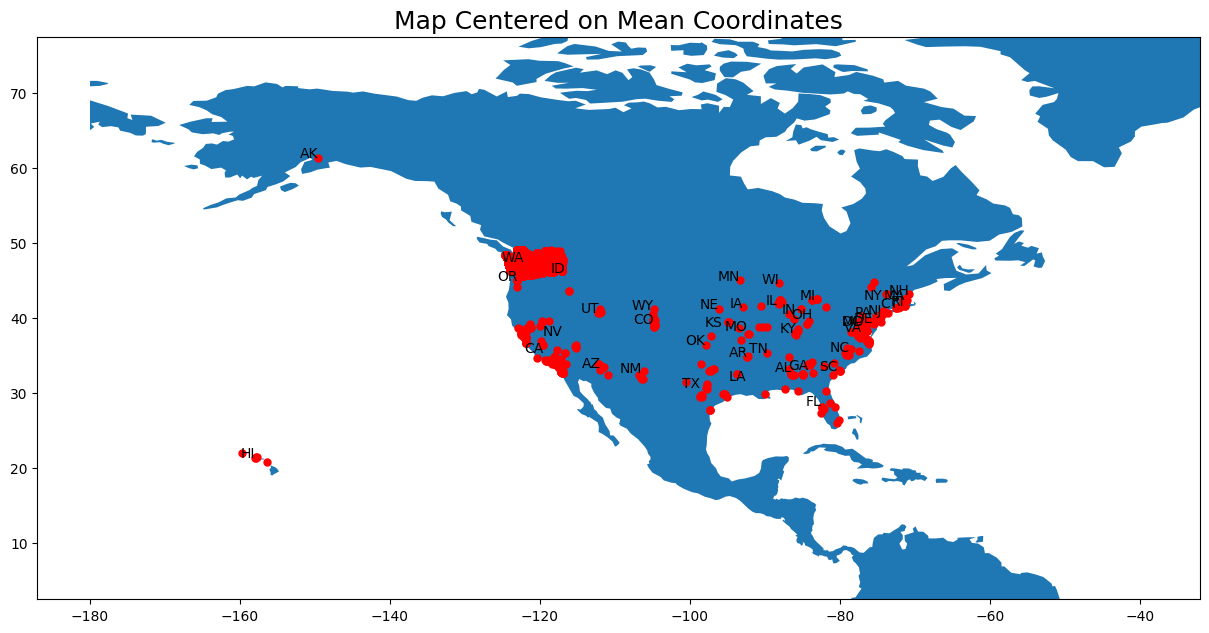

In [88]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

# Assuming df is already defined with 'Longitude', 'Latitude', and 'State' columns
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

# Load the world map data
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Calculate the mean longitude and latitude
mean_longitude = df['Longitude'].mean()
mean_latitude = df['Latitude'].mean()

# Create the plot with increased figure size
ax = world.plot(figsize=(15, 10))  # Increased size for better visibility

# Plot the GeoDataFrame points
gdf.plot(ax=ax, marker='o', color='red', markersize=25)  # Increased markersize

# Set the x and y limits to center the map around the mean coordinates
ax.set_xlim(mean_longitude - 65, mean_longitude + 90)  # Expanded limits
ax.set_ylim(mean_latitude - 45, mean_latitude + 30)    # Expanded limits

# Optionally, add a title
ax.set_title('Map Centered on Mean Coordinates', fontsize=18)

# Annotate the map with distinct state names
# Get unique states with their mean coordinates
unique_states = df.groupby('State').agg({'Longitude': 'mean', 'Latitude': 'mean'}).reset_index()

# Add state names to the plot
for idx, row in unique_states.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['State'], fontsize=10, ha='right')

# Show the plot
plt.show()


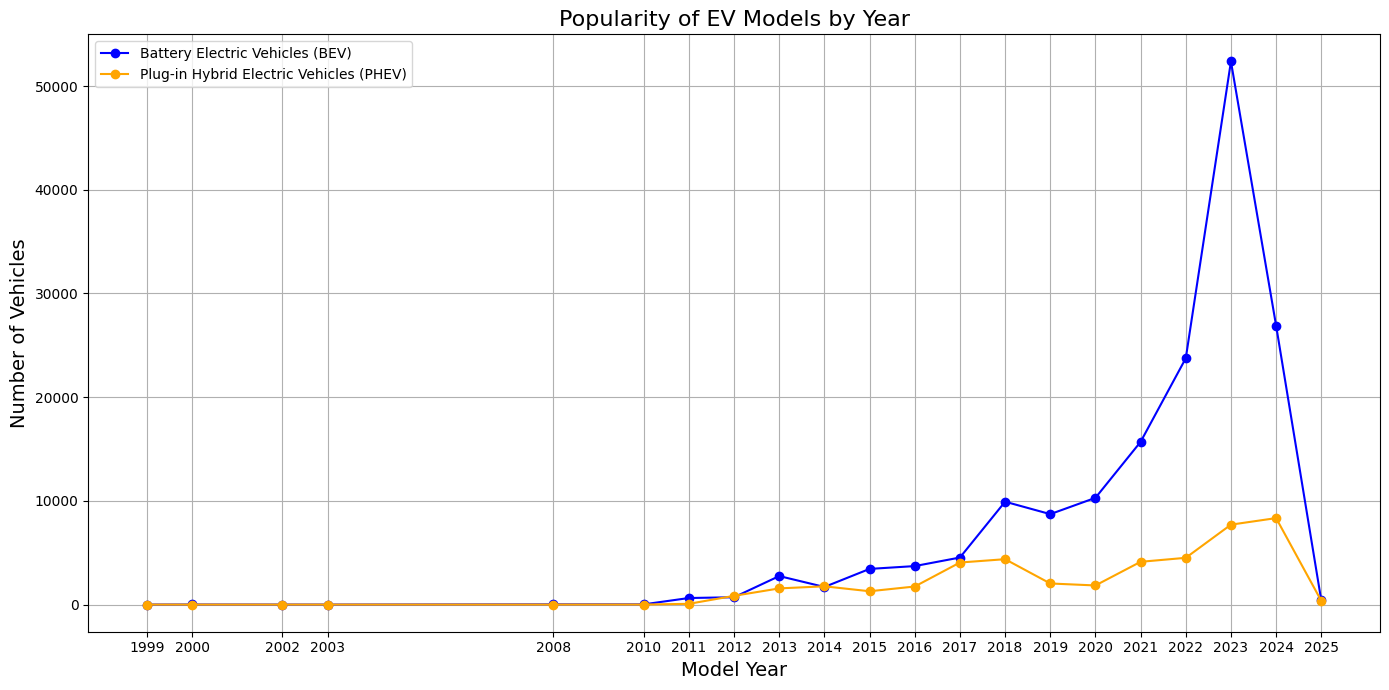

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (use your actual DataFrame instead)
# df = pd.read_csv('your_data.csv')  # Uncomment this line to read from your dataset

# Step 1: Prepare the data
# Group by Model Year and sum the counts of BEV and PHEV
popularity_data = df.groupby('Model Year').agg({
    'Electric Vehicle Type_Battery Electric Vehicle (BEV)': 'sum',
    'Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)': 'sum'
}).reset_index()

# Step 2: Create visualizations
plt.figure(figsize=(14, 7))

# Plot for BEV
plt.plot(popularity_data['Model Year'], popularity_data['Electric Vehicle Type_Battery Electric Vehicle (BEV)'],
         marker='o', label='Battery Electric Vehicles (BEV)', color='blue')

# Plot for PHEV
plt.plot(popularity_data['Model Year'], popularity_data['Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)'],
         marker='o', label='Plug-in Hybrid Electric Vehicles (PHEV)', color='orange')

# Adding titles and labels
plt.title('Popularity of EV Models by Year', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(popularity_data['Model Year'])  # Set x-ticks to be the model years
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Numeric Columns:
Index(['Postal Code', 'Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Electric Utility', '2020 Census Tract', 'Electric Vehicle Type_Battery Electric Vehicle (BEV)', 'Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range', 'Longitude', 'Latitude'], dtype='object')


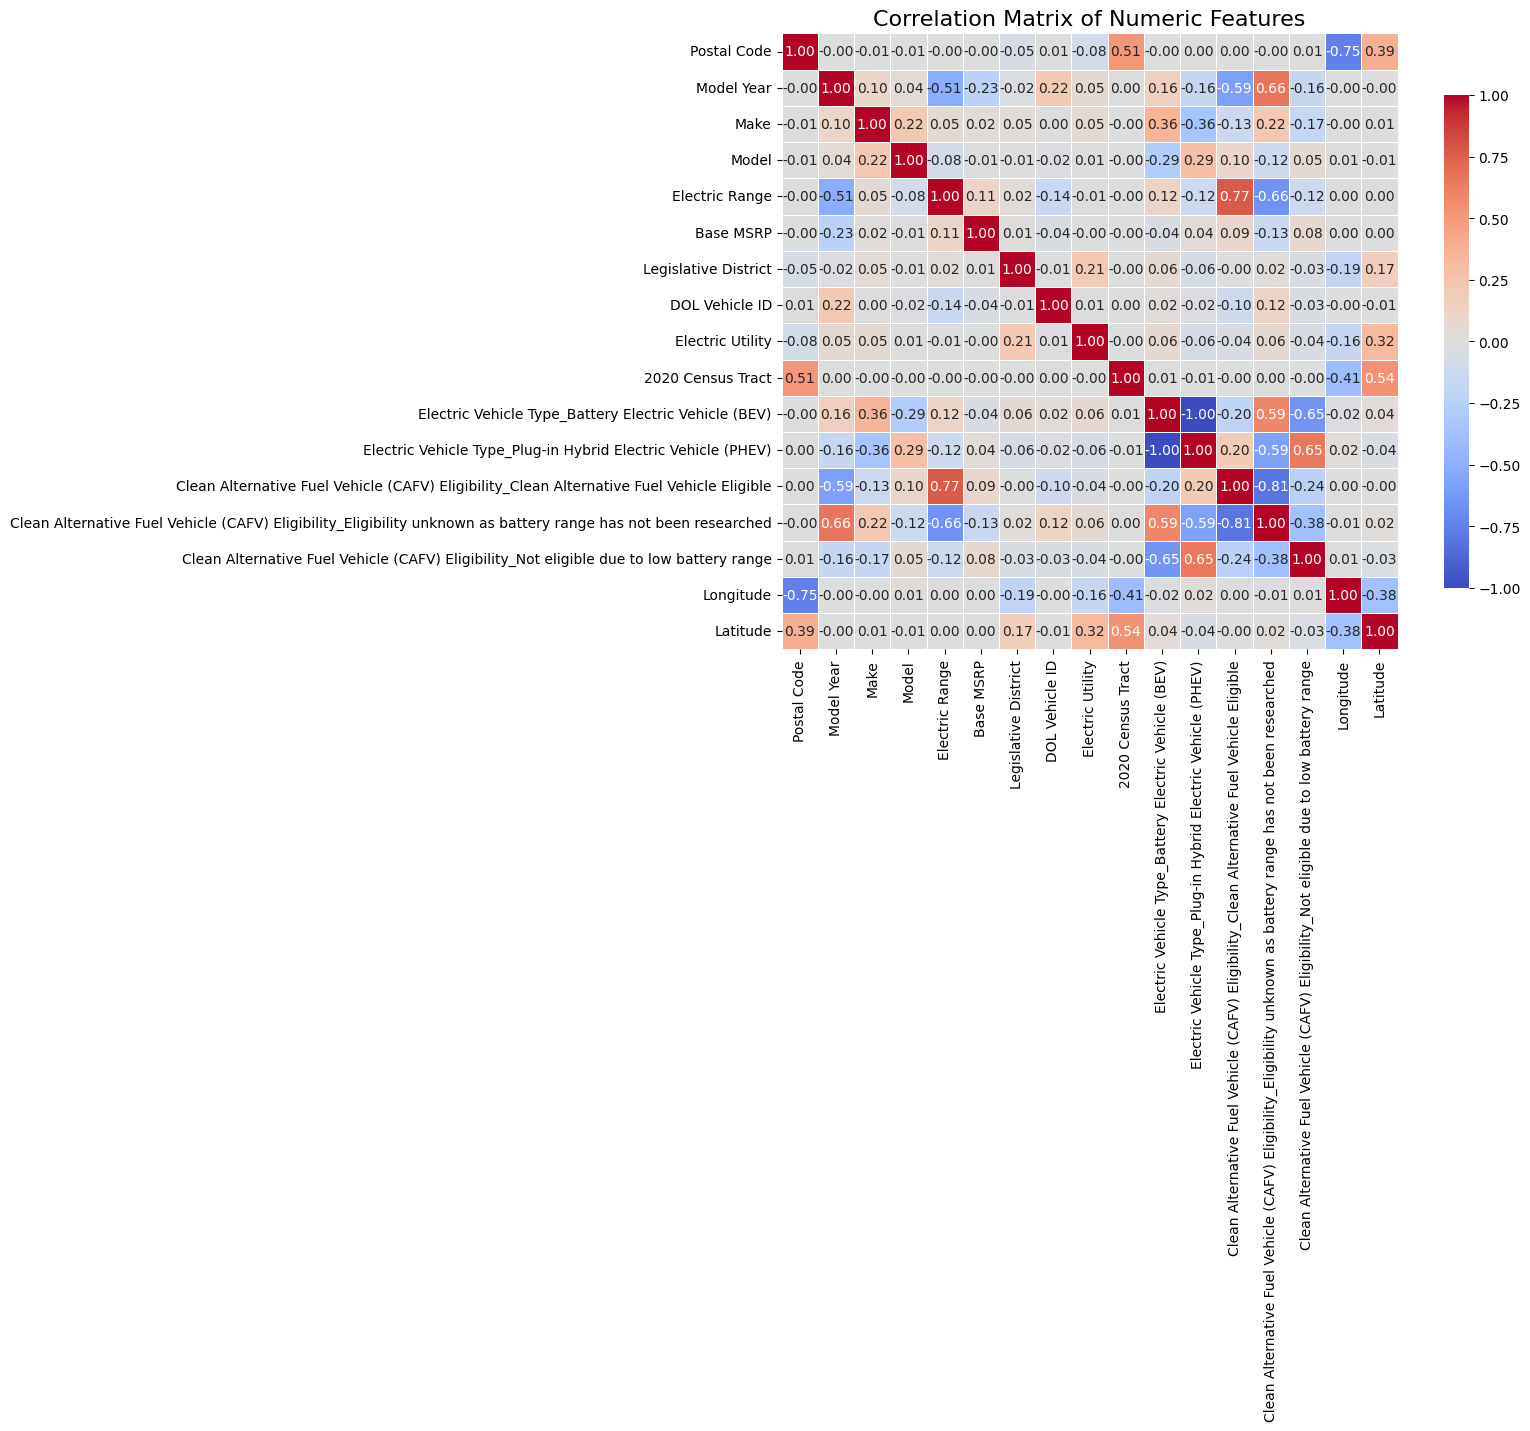

                                                    Postal Code  Model Year    Make      Model   Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  Electric Utility  2020 Census Tract  Electric Vehicle Type_Battery Electric Vehicle (BEV)  Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched  Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range  Longitude  Latitude
Postal Code                                          1.000000    -0.001290  -0.010499 -0.006002    -0.000798    -0.003411        -0.051840           0.005864        -0.080010          0.508744                          -0.004122                                              0.004122                                                      0.000489                              

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation (use your actual DataFrame instead)
# df = pd.read_csv('your_data.csv')  # Uncomment this line to read from your dataset

# Step 1: Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check for non-numeric columns
print("Numeric Columns:")
print(numeric_df.columns)

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

# Step 4: Print out the correlation coefficients
print(correlation_matrix)


<ipython-input-95-896654b59cf3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='EV Count', palette='viridis')


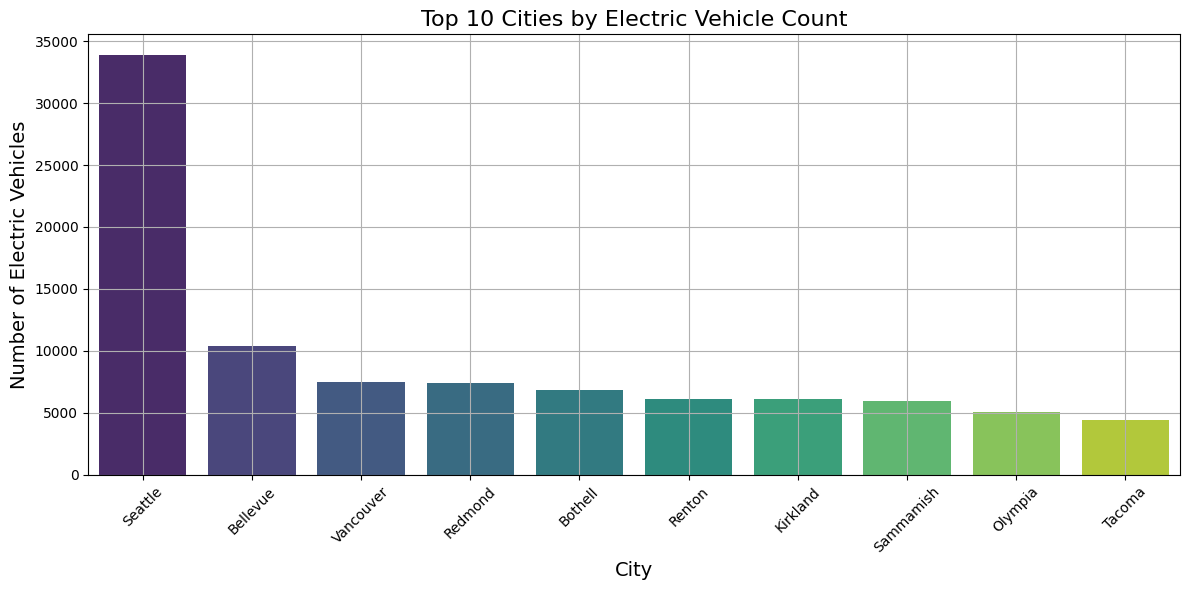

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation (use your actual DataFrame instead)
# df = pd.read_csv('your_data.csv')  # Uncomment this line to read from your dataset

# Step 1: Group data by City or County
# You can use either df['City'] or df['County'] based on your preference
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'EV Count']

# Optional: Select top N cities for a clearer visualization
top_n = 10
top_cities = city_counts.nlargest(top_n, 'EV Count')

# Step 2: Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='EV Count', palette='viridis')

# Add title and labels
plt.title(f'Top {top_n} Cities by Electric Vehicle Count', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Electric Vehicles', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()


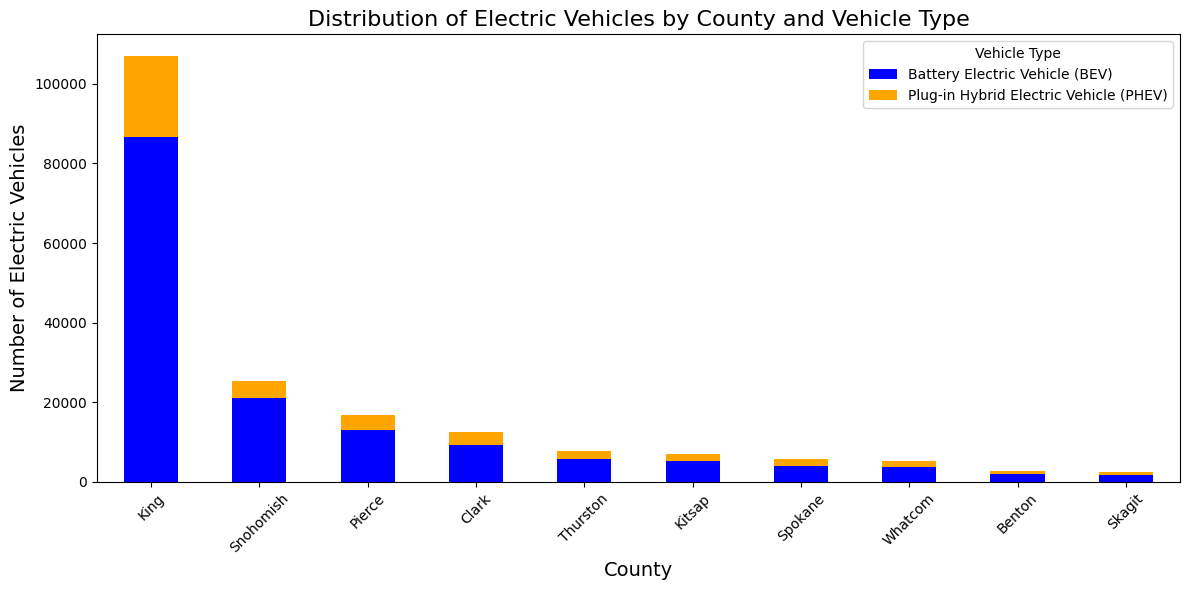

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (use your actual DataFrame instead)
# df = pd.read_csv('your_data.csv')  # Uncomment this line to read from your dataset

# Assuming the columns 'County', 'Electric Vehicle Type_Battery Electric Vehicle (BEV)', and
# 'Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)' exist in your DataFrame
# Step 1: Filter relevant columns and count EV types
# Replace the EV type columns with their appropriate one-hot encoded names if they are different
df['BEV'] = df['Electric Vehicle Type_Battery Electric Vehicle (BEV)']
df['PHEV'] = df['Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)']

# Step 2: Count the number of BEVs and PHEVs per county
county_counts = df.groupby('County').agg({'BEV': 'sum', 'PHEV': 'sum'}).reset_index()

# Step 3: Select the top 10 counties by total EV count
county_counts['Total'] = county_counts['BEV'] + county_counts['PHEV']
top_counties = county_counts.nlargest(10, 'Total')

# Step 4: Create a stacked bar chart
ax = top_counties.set_index('County')[['BEV', 'PHEV']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'orange'])

# Add title and labels
plt.title('Distribution of Electric Vehicles by County and Vehicle Type', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Number of Electric Vehicles', fontsize=14)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Vehicle Type', labels=['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])
plt.show()


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210150 entries, 0 to 210164
Data columns (total 24 columns):
 #   Column                                                                                                          Non-Null Count   Dtype  
---  ------                                                                                                          --------------   -----  
 0   VIN (1-10)                                                                                                      210150 non-null  object 
 1   County                                                                                                          210150 non-null  object 
 2   City                                                                                                            210150 non-null  object 
 3   State                                                                                                           210150 non-null  object 
 4   Postal Code                          

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()


ValueError: could not convert string to float: '5UXTA6C0XM'

In [105]:
# Compute correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()


ValueError: could not convert string to float: '5UXTA6C0XM'

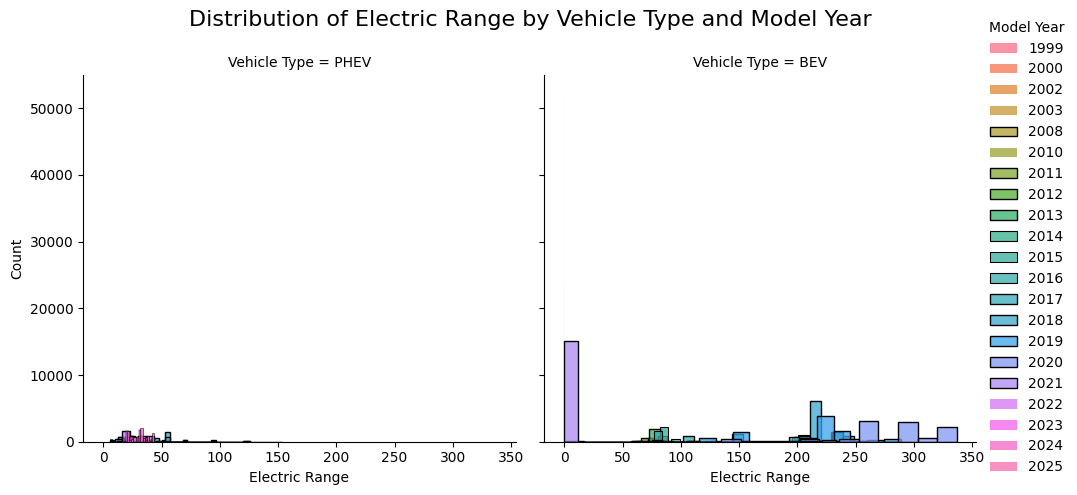

In [107]:
g = sns.FacetGrid(df, col='Vehicle Type', hue='Model Year', col_wrap=2, height=5)
g.map(sns.histplot, 'Electric Range', bins=20)
g.add_legend()
g.fig.suptitle('Distribution of Electric Range by Vehicle Type and Model Year', fontsize=16)
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()


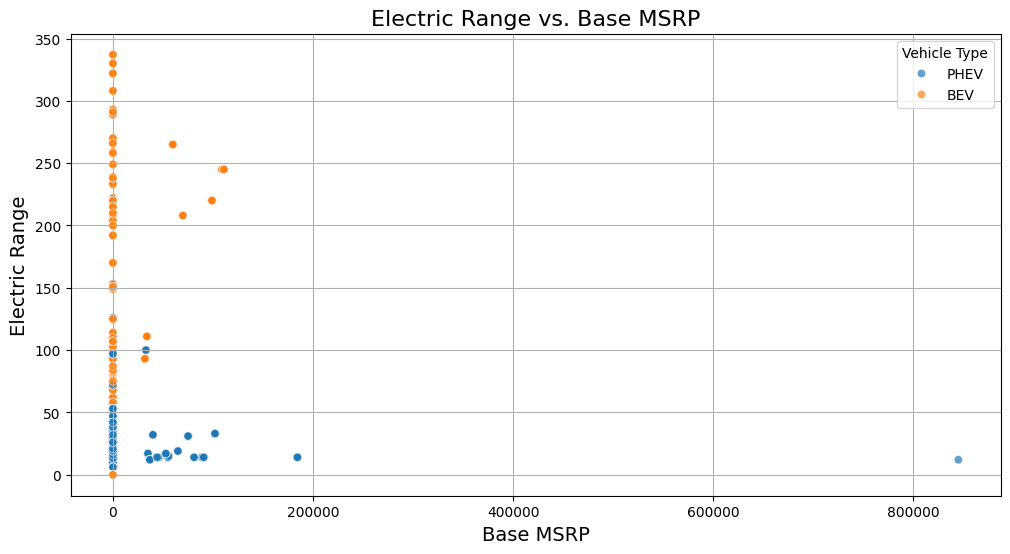

In [108]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Base MSRP', y='Electric Range', hue='Vehicle Type', alpha=0.7)
plt.title('Electric Range vs. Base MSRP', fontsize=16)
plt.xlabel('Base MSRP', fontsize=14)
plt.ylabel('Electric Range', fontsize=14)
plt.legend(title='Vehicle Type')
plt.grid()
plt.show()
